## Training and Evaluation

In [1]:
import train_agents as ta
import numpy as np

In [2]:
reward_names = list(ta.REWARD_FUNCTIONS.keys())
action_names = list(ta.ACTION_FUNCTIONS.keys())
algorithms = ['ddpg', 'td3', 'sac']
results = {}
for algo in algorithms:
    for r in reward_names:
        for a in action_names:
            results[(algo, r, a)] = ta.run_experiment(algo, r, a, n_episodes=1, max_t=1)
print('Total runs:', len(results))

Total runs: 147


Sample result: {'scores': [0.0], 'moving_avg': [np.float64(0.0)], 'shortfalls': [nan], 'cumulative_rewards': [[np.float64(0.0)]], 'ac_expected_shortfall': np.float64(477712.5967427215)}


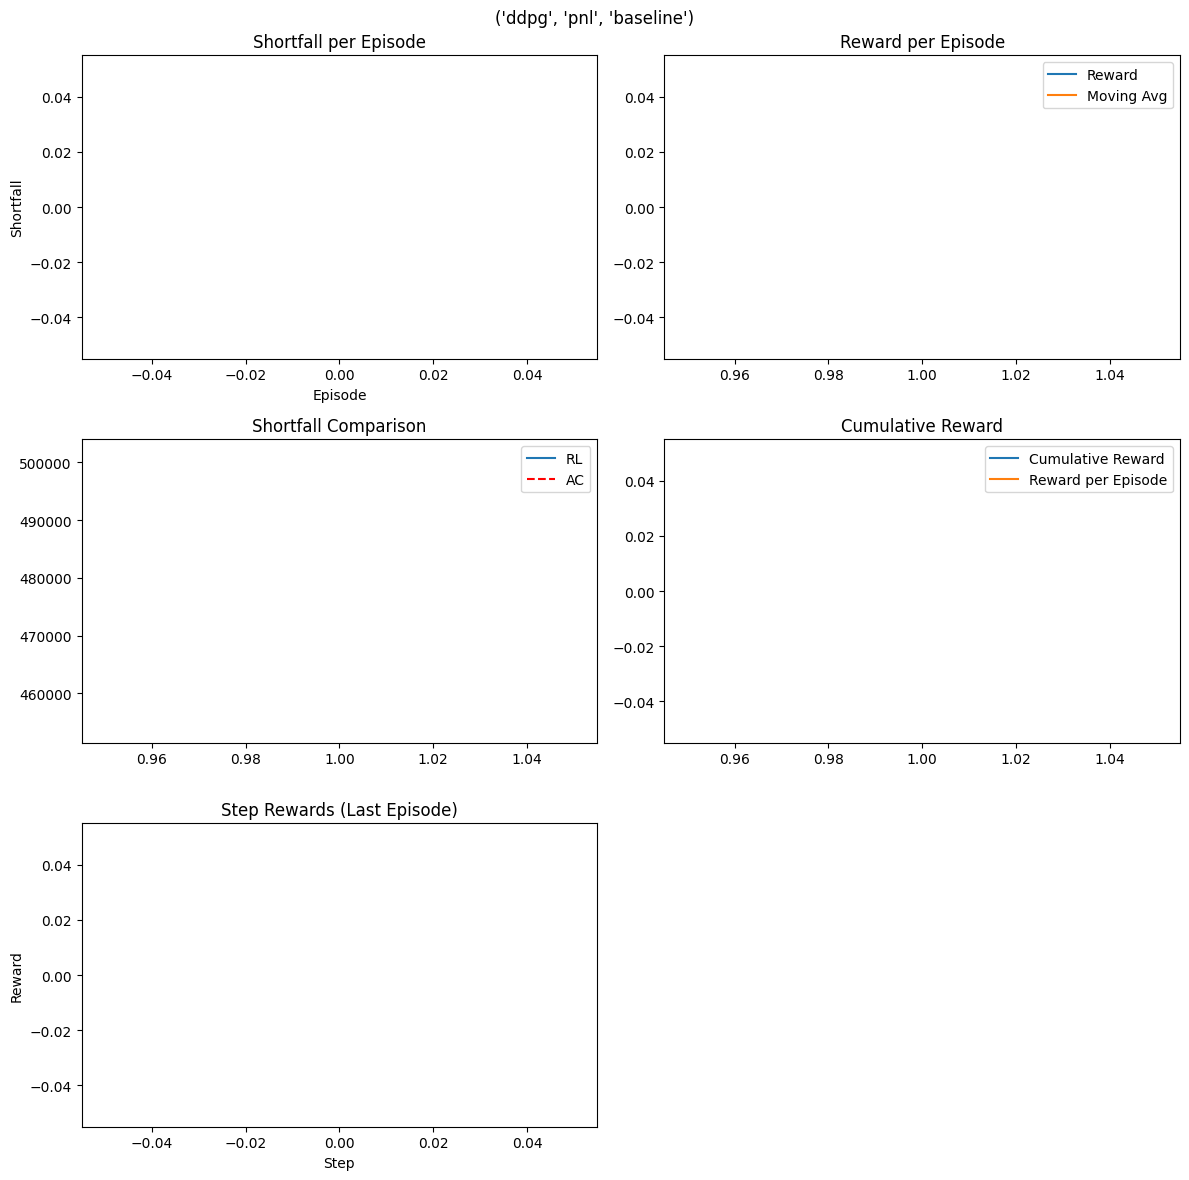

In [3]:
sample_key = ('ddpg', reward_names[0], action_names[0])
sample_result = results[sample_key]
print('Sample result:', {k: v for k, v in sample_result.items() if k != 'step_rewards'})
ta.plot_results(sample_result, title=str(sample_key))

In [4]:
best, history = ta.hyperparameter_tuning('ddpg', reward_names[0], action_names[0], 'lr_actor', [1e-4, 1e-3], n_episodes=1, max_t=1)
print('Best lr_actor:', best)
print('History:', history)

Best lr_actor: 0.0001
History: [(0.0001, 0.0), (0.001, 0.0)]
